In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
# y=(1+Ax+Bx^2)/(1+Cx+Dx^2)

In [29]:
A, B, C, D = 1, 8, 5, 7

faker_data = pd.DataFrame({'x': np.linspace(0, 200) / 100})
faker_data['value'] = faker_data['x'].apply(
    lambda x: ((1 + A * x + B * x ** 2) / (1 + C * x + D * x ** 2) + np.random.random(1)/100)[0])  # 这里最后面是np.random.random(1) * 15添加的随机数。
faker_data.head(3)

,x,value
0,0.000000,1.006863
1,0.040816,0.869350
2,0.081633,0.788370


Text(0, 0.5, 'value')

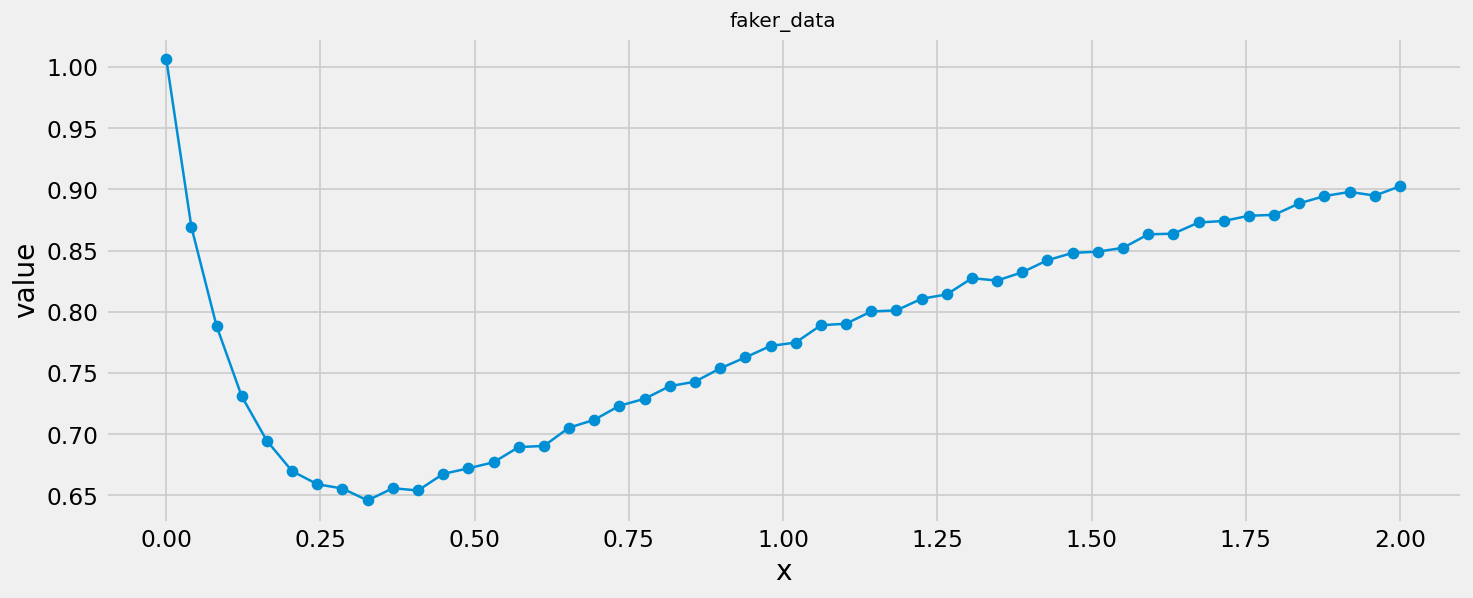

In [30]:
# 把原始数据画出来
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(13, 5), dpi=120)
ax.scatter(faker_data['x'], faker_data['value'])
ax.plot(faker_data['x'], faker_data['value'])
ax.set_title("faker_data")
ax.set_xlabel("x")
ax.set_ylabel("value")

In [32]:
params0 = [0, 0, 0, 0]  # 设置一个初始化参数，用来等待模拟。


def loss_function(params):
    """
    损失函数
    params = [A, B, C, D, E]
    """
    real_x = faker_data['x'].values
    real_y = faker_data['value'].values
    small_function = lambda x: (1 + params[0]*x + params[1]*x**2) / (1 + params[3]*x + params[3]*x**2)
    predict = small_function(real_x)
    result = np.mean((predict - real_y) ** 2)
    return result


# minimize就是优化器，让我们的loss_function的值越来越小。

res = minimize(fun=loss_function, x0=params0, method='powell')  # nelder-mead powell
res

   direc: array([[ 1.97272085e-01,  2.53503750e-01,  5.08625643e+02,
         3.01815875e-01],
       [ 9.49417021e-01,  3.68554403e+00,  6.45634957e+03,
         2.95402754e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-3.03098655e-02, -3.50395794e-02, -6.89537528e+01,
        -3.76365176e-02]])
     fun: 1.2593361606253695e-05
 message: 'Optimization terminated successfully.'
    nfev: 765
     nit: 15
  status: 0
 success: True
       x: array([1.79779622e+00, 7.22599951e+00, 1.26953708e+04, 5.99980819e+00])

In [33]:
res.x  # 预测的参数 # 返回预测的参数

array([1.79779622e+00, 7.22599951e+00, 1.26953708e+04, 5.99980819e+00])

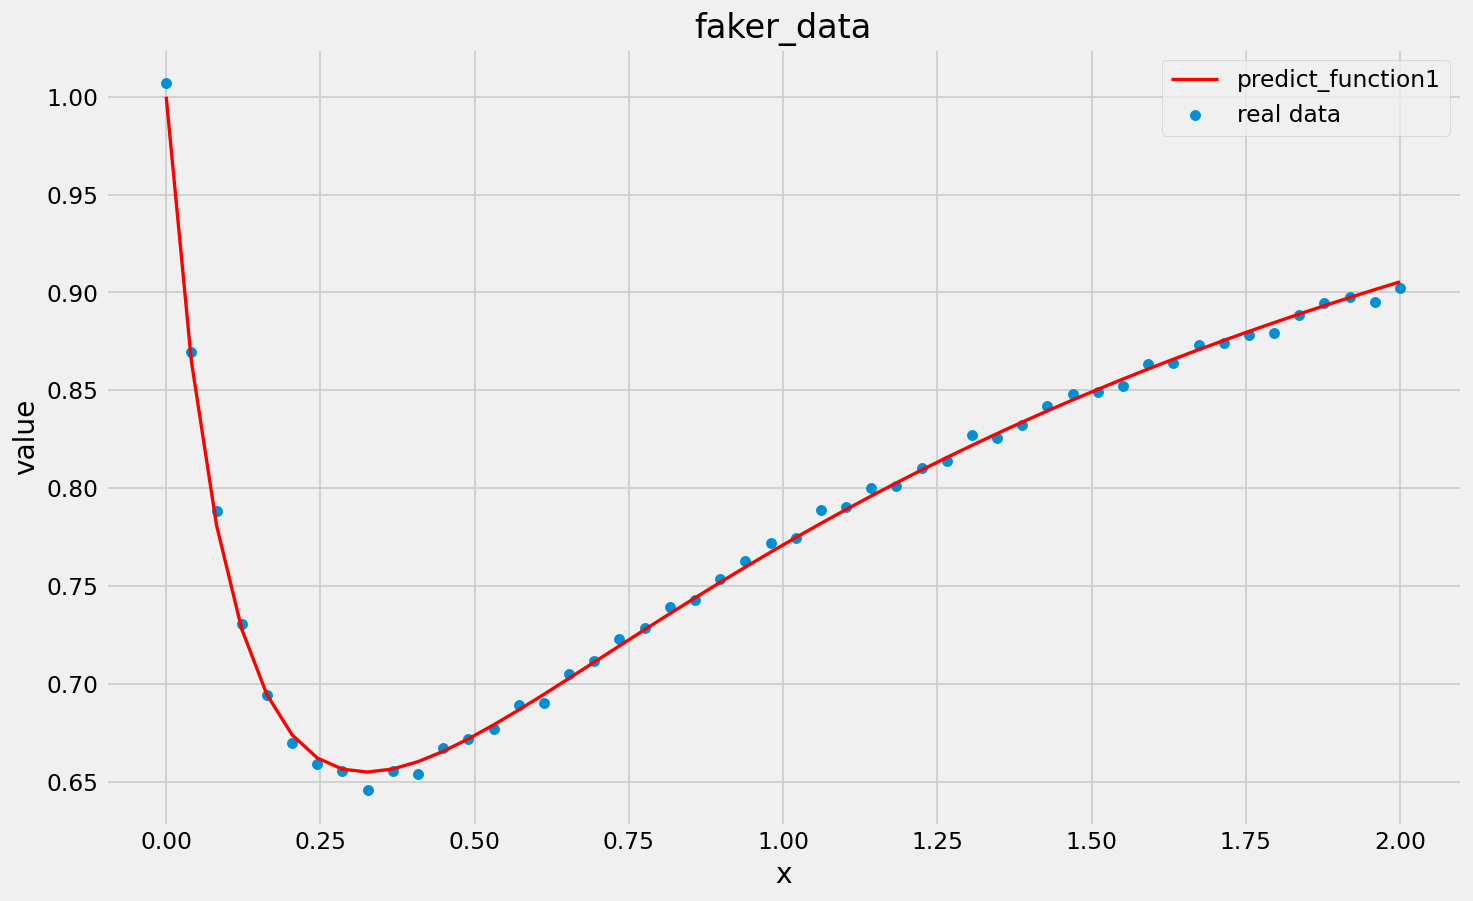

In [35]:

params = res.x
predict_function1 = lambda x: (1 + params[0]*x + params[1]*x**2) / (1 + params[3]*x + params[3]*x**2)  # 这个是我们要构造的目标函数

predict_value1 = faker_data['x'].apply(lambda x: predict_function1(x))  # 计算预测值

# 还有些内容，我没计算，先不算了
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(13, 8), dpi=120)
    ax.plot(faker_data['x'], predict_value1, label='predict_function1', color='red', alpha=1, linewidth=2)
    ax.scatter(faker_data['x'], faker_data['value'], label='real data')
    ax.set_title("faker_data")
    ax.set_xlabel("x")
    ax.set_ylabel("value")
    ax.legend()